In [112]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report



## Gaussian Naive Bayes

In [113]:
data = load_breast_cancer()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
405,10.940,18.59,70.39,370.0,0.10040,0.07460,0.04944,0.02932,0.1486,0.06615,...,25.58,82.76,472.4,0.13630,0.1644,0.14120,0.07887,0.2251,0.07732,1
400,17.910,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,0.07115,...,27.78,149.60,1304.0,0.18730,0.5917,0.90340,0.19640,0.3245,0.11980,0
514,15.050,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.04335,0.1561,0.05915,...,28.06,113.80,967.0,0.12460,0.2101,0.28660,0.11200,0.2282,0.06954,0
475,12.830,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.03078,0.1705,0.05913,...,19.35,93.22,605.8,0.13260,0.2610,0.34760,0.09783,0.3006,0.07802,1
273,9.742,15.67,61.50,289.9,0.09037,0.04689,0.01103,0.01407,0.2081,0.06312,...,20.88,68.09,355.2,0.14670,0.0937,0.04043,0.05159,0.2841,0.08175,1
54,15.100,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,...,31.69,117.70,1030.0,0.13890,0.2057,0.27120,0.15300,0.2675,0.07873,0
463,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516,0.05859,...,24.02,82.68,495.1,0.13420,0.1808,0.18600,0.08288,0.3210,0.07863,1
267,13.590,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.02142,0.1635,0.05859,...,30.04,97.66,661.5,0.10050,0.1730,0.14530,0.06189,0.2446,0.07024,1
304,11.460,18.16,73.59,403.1,0.08853,0.07694,0.03344,0.01502,0.1411,0.06243,...,21.61,82.69,489.8,0.11440,0.1789,0.12260,0.05509,0.2208,0.07638,1
298,14.260,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,25.26,105.80,819.7,0.09445,0.2167,0.15650,0.07530,0.2636,0.07676,1


target
1    357
0    212
Name: count, dtype: int64


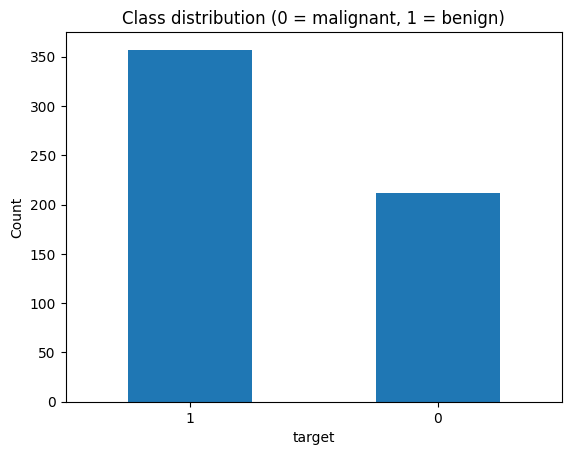

In [114]:
class_counts = df['target'].value_counts()
print(class_counts)

plt.figure()
class_counts.plot(kind='bar')
plt.xticks(ticks=[0,1],  rotation = 0)
plt.title('Class distribution (0 = malignant, 1 = benign)')
plt.ylabel('Count')
plt.show()

In [115]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.25, random_state=42, stratify=y)

model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [116]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print('accuracy_score: ',acc)

accuracy_score:  0.9370629370629371


Confusion matrix: 
 [[46  7]
 [ 2 88]]


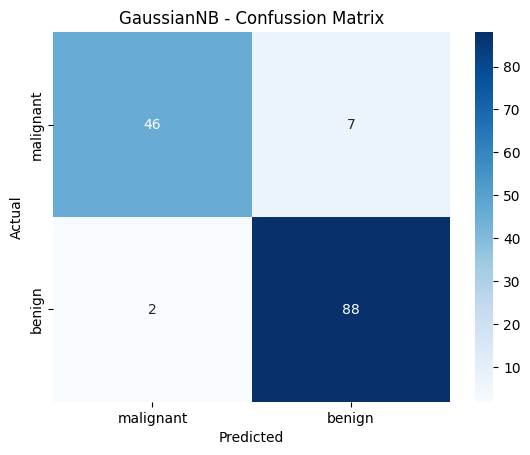

In [117]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GaussianNB - Confussion Matrix')
plt.show()

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        53
           1       0.93      0.98      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



## Multinominal Naive Bayes text Data

In [119]:
texts = [
    'I love this product',
    'This is amazing and fantastic',
    'I really like this',
    'I hate this item',
    'This is the worst thing ever',
    'Horrible and terrible experience',
    'Fuck'
]
labels = [1, 1, 1, 0, 0, 0,0]  # 1 = positive, 0 = negative

toy_df = pd.DataFrame({'text': texts, 'label': labels})
toy_df

,text,label
0,I love this product,1
1,This is amazing and fantastic,1
2,I really like this,1
3,I hate this item,0
4,This is the worst thing ever,0
5,Horrible and terrible experience,0
6,Fuck,0


In [120]:
vectorizer = CountVectorizer()
X_toy = vectorizer.fit_transform(toy_df['text'])
y_toy = toy_df['label']



In [121]:
model = MultinomialNB()
model.fit(X_toy, y_toy)

y_toy_pred = model.predict(X_toy)

print('Accuracy : ', accuracy_score(y_toy, y_toy_pred))
print('classification_report: ')
print(classification_report(y_toy, y_toy_pred))

Accuracy :  1.0
classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [122]:
new_texts = [
    'I love it',
    'This product is horrible',
    'Fantastic experience',
    'Worst purchase ever', 
    'Fuck this Product'
]

x_new = vectorizer.transform(new_texts)
new_pred = model.predict(x_new)

for txt, pred in zip(new_texts, new_pred):
    label_str = 'positive' if pred == 1 else 'negative'
    print(f'{txt!r} -> {label_str}')

'I love it' -> positive
'This product is horrible' -> positive
'Fantastic experience' -> negative
'Worst purchase ever' -> negative
'Fuck this Product' -> positive


## Real Data

In [123]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics', 'rec.sport.baseball', 'sci.med']

newsgroups = fetch_20newsgroups(
    subset = 'train',
    categories=categories,
    remove=('headers', 'footers', 'quotes'),
    shuffle=True,
    random_state=42
)

In [124]:
df_news = pd.DataFrame({
    'text': newsgroups.data,
    'label':newsgroups.target
})
df_news.head()

,text,label
0,"\nThe FDA, I believe. Rules say no blood or b...",2
1,,2
2,It would be nice to think that individuals can...,2
3,"Ok all you trivia buffs, I have a good one for...",1
4,"Please , I need the starting address (pointer)...",0


In [125]:
X_train,  X_test, y_train, y_test = train_test_split(df_news['text'], df_news['label'], test_size=.25, random_state=42)

X_train.shape, X_test.shape

((1331,), (444,))

In [126]:
vectorizer_news = CountVectorizer(stop_words='english',max_features=3000)
X_train_counts = vectorizer_news.fit_transform(X_train)
X_test_counts = vectorizer_news.fit_transform(X_test)

print('Shape of X_train_counts:', X_train_counts.shape)
print('Shape of X_test_counts:', X_test_counts.shape)

mnb_news = MultinomialNB()
mnb_news.fit(X_train_counts, y_train)



Shape of X_train_counts: (1331, 3000)
Shape of X_test_counts: (444, 3000)


MultinomialNB()

Accuracy on 20 Newsgroups subset: 0.509009009009009
Confusion matrix:
 [[ 49  38  56]
 [ 18  77  52]
 [  9  45 100]]


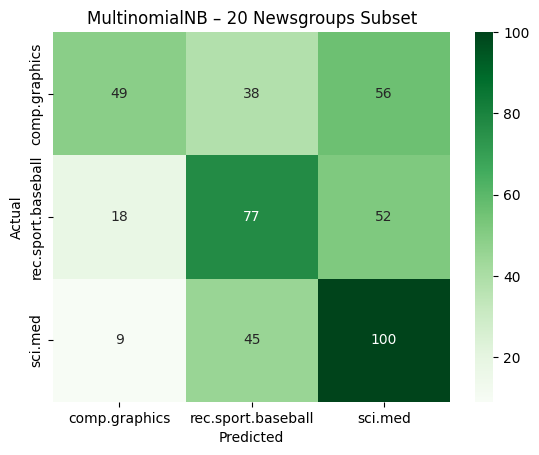

Classification report:
                    precision    recall  f1-score   support

     comp.graphics       0.64      0.34      0.45       143
rec.sport.baseball       0.48      0.52      0.50       147
           sci.med       0.48      0.65      0.55       154

          accuracy                           0.51       444
         macro avg       0.54      0.51      0.50       444
      weighted avg       0.53      0.51      0.50       444



In [127]:
y_news_pred = mnb_news.predict(X_test_counts)
acc_news = accuracy_score(y_test, y_news_pred)
print('Accuracy on 20 Newsgroups subset:', acc_news)

cm_news = confusion_matrix(y_test, y_news_pred)
print('Confusion matrix:\n', cm_news)

sns.heatmap(cm_news, annot=True, fmt='d', cmap='Greens',
            xticklabels=newsgroups.target_names,
            yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MultinomialNB – 20 Newsgroups Subset')
plt.show()

print('Classification report:')
print(classification_report(y_test, y_news_pred,
                            target_names=newsgroups.target_names))